#  <span style="color:orange">Forecast Tutorial (FOC101) - Level Beginner</span>

Welcome to Forecast Tutorial (FOC101) - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with Forecasting using the pycaret.forecast Module.

In this tutorial we will learn:

* **Getting Data**: How to import data from PyCaret repository
* **Setting up Environment**: How to setup an experiment in PyCaret and get started with building forecasting models
* **Create Model**: How to create a model, perform time series cross validation and evaluate forecasting metrics
* **Auto Selection**: How to select a model based on the best fit.

## 1.1 Installing PyCaret
If you haven't installed PyCaret yet. Please follow the link to __[Beginner's Tutorial](https://github.com/pycaret/pycaret/blob/master/Tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)__ for instructions on how to install pycaret.

## 1.2 Pre-Requisites
- Python 3.x
- Latest version of pycaret
- Internet connection to load data from pycaret's repository
- Completion of Regression Tutorial (REG101) - Level Beginner

## 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


# 2.0 What is Forecasting?

Is a set of mathematical tools to make predictions of the future based on past data. A great introduction to the subject is Rob Hyndman's [Forecasting: Principles and Practice](https://otexts.com/fpp2/)


# 3.0 Overwiew of Forecast Module in Pycaret

PyCaret's Forecast module (`pycaret.forecast`) can be used to predict univariate Time Series data through Simple Exponential Smoothing, Holt or Arima model. Additionally the `auto_select` function runs these three models on the data selects the one that achieves the lower value of the given metric, such as [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) or [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error). 

# 4.0 Dataset for the Tutorial

The original dataset and description can be __[found here.](https://www.kaggle.com/chirag19/air-passengers/data)__ 

# 5.0 Getting the data 

You can download the data from the original source __[found here.](https://www.kaggle.com/chirag19/air-passengers/data)__ and load it using the pandas read_csv function or you can use PyCaret's data respository to load the data using the get_data function (This will require internet connection). Two variables are provided on the dataset:

- **Month:** Month and year values from January 1949 to December 1960
- **#Passengers:** The number of passengers in the month that took flyes in the US.

In this tutorial, we're going to consider `#Passengers` as a univariate time series, and we will forecast the next couple of months.  

In [1]:
from pycaret.datasets import get_data
from pycaret.forecast import *

import pandas as pd

air_passangers = get_data('air_passangers')

In [2]:
#check the shape of data
data.shape

(144, 2)

# 6.0 Setting up Environment in Pycaret 

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any working experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In this example, we would like to remove any values that passes beyond nearly three standard deviations, one can achieve this by setting `remove_outliers=True` and `outliers_threshold=0.003`. If there is any atipical observation the sum of the shapes for the Train and Test sets would be different than the Original Data shape.

In [3]:
exp_foc101 = setup(data, target='#Passengers', remove_outliers=True, outliers_threshold=0.003)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4890
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(144, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Transformed Train Set,"(100, 21)"
7,Transformed Test Set,"(44, 21)"
8,Numeric Imputer,mean
9,Normalize,False


# 7.0 Creating a model

The avaible options are

* [sem](https://otexts.com/fpp2/ses.html). Simple Exponential Smoothing Model.
* [holt](https://otexts.com/fpp2/holt.html). Holt-Linear Trend Model.
* [auto_arima](https://alkaline-ml.com/pmdarima/tips_and_tricks.html). The `auto_arima` implementation in Python of the original function from the R package forecast.

Under the hood `create_model` runs the [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) function from scikit-learn and calculates some relevant metrics like the 
`RMSE`, the `MAPE` or the `AIC` to evaluate the performance of the model. Thus, it will output these metrics for every split that we choose of the data and the model that we choose. Let's see this through an example.

In [4]:
model, model_results = create_model('sem', splits = 5, verbose=True)

,MAE,MSE,RMSE,MAPE,AIC,BIC
0,43.5833,2477.0833,49.7703,0.2247,131.3489,133.7050
1,39.6250,2419.7083,49.1905,0.1578,269.0861,272.8285
2,77.1250,8301.6250,91.1133,0.2338,428.2398,432.7931
3,69.2083,8205.0417,90.5817,0.1663,607.7719,612.9006
4,115.2500,18859.2500,137.3290,0.2358,808.8125,814.3875
Mean,68.9583,8052.5417,83.5970,0.2037,449.0518,453.3229
SD,27.2544,5994.7442,32.6204,0.0343,240.1565,241.2418


# 8.0 The `auto_select()` function

The `auto_select()` function chooses automatically the model that best fits the data by just providing a metric based on which you would like to selet this model. As illustration, we're going to select a model based on the [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) criteria, which is normally used to balance the complexity of the model. 

In [5]:
auto_model, auto_model_results = auto_select(splits=5, metric='rmse', verbose=True)

,MAE,MSE,RMSE,MAPE,AIC,BIC
0,48.9312,3008.0559,54.8457,0.2539,191.2958,196.0080
1,24.8022,832.3146,28.8499,0.1081,385.6269,396.7278
2,45.6432,3551.5718,59.5951,0.1352,604.9559,618.5320
3,47.0761,2953.5406,54.3465,0.1259,835.9621,851.2854
4,46.9275,4570.2145,67.6034,0.0923,1087.0292,1103.7039
Mean,42.6760,2983.1395,53.0481,0.1431,620.9740,633.2514
SD,8.9982,1222.2493,13.0015,0.0573,317.3942,321.3118


# 8.0 The `forecast()` function

If we want to forecast `n` steps ahead the value of the current time series, we just need to call the `forecast()` function. There are three basic parameters: 

* **steps**: The number of steps ahead point forecast. 

* **plot**: If we would like to graphically visualize the results of the point forecast. We specify this parameter to True `plot=True`.

* **style**: Behind this function we're calling a matplot.pyplot graph. Thus, we can specify which a style sheet for the plot. For more info see the official [documentation](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

In the above example we're going to forecast twelve months ahead data for the national flights in the US given the best model that `auto_model()` select for us. Notice that we're assigning the result of the function to a trash variable `_`.

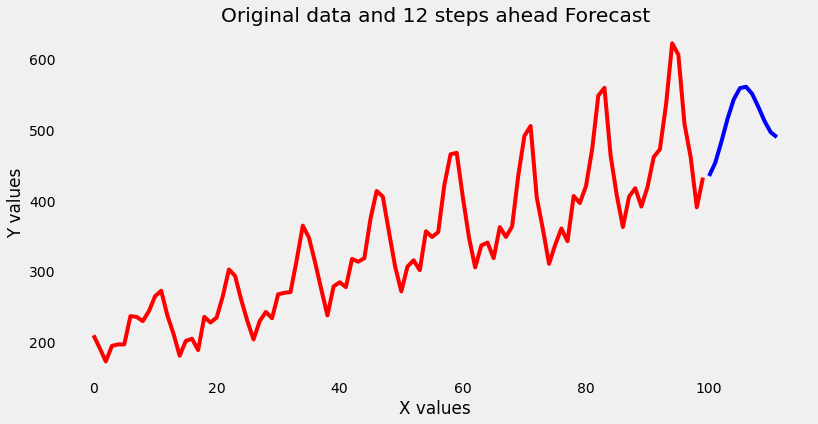

In [6]:
_ = forecast(auto_model, steps=12, plot=True, style='fivethirtyeight')